In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
x = dataset.iloc[:, 3:5].values

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

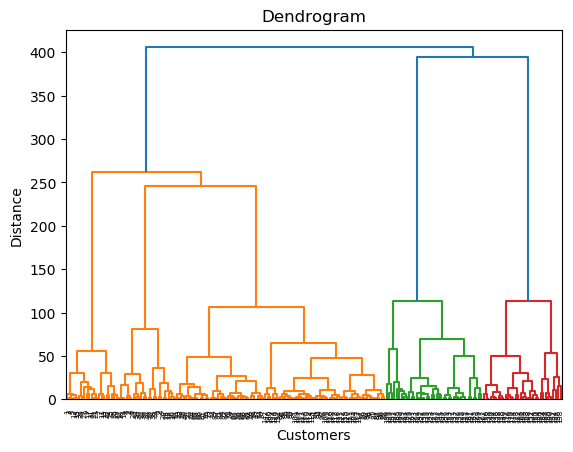

In [10]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [11]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=None).fit(x)
y_brc=brc.predict(x)

In [12]:
y_brc

array([ 38,   0,  39,   1,  40,   2,  41,   3,  42,   4,  43,   5,  44,
         6,  45,   7,  46,   8,  47,   9,  48,  10,  49,  10,  50,  11,
        51,  12,  52,  13,  53,  14,  54,  15,  55,  16,  56,  17,  57,
        18,  59,  19,  60,  20,  58,  21,  22,  61,  62,  62,  63,  23,
        64,  23,  65,  66,  67,  68,  69,  70,  24,  24,  71,  25,  72,
        25,  72,  73,  25,  73,  26,  74,  77,  27,  78,  28,  79,  78,
        79,  75,  80,  81,  75,  76,  29,  82,  30,  83,  31,  84,  85,
        86,  87, 140,  88,  89,  90,  87,  88,  91,  92,  93,  94,  95,
        95,  92,  96,  97,  98,  93,  99, 100, 101,  97, 102, 103, 104,
       105, 106, 107, 107, 141, 108,  32, 142, 109, 143,  33, 144, 110,
       145, 110, 146, 111, 147,  34, 148, 112, 149, 113, 150,  35, 151,
        36, 152,  37, 153, 114, 154, 115, 155, 116, 156, 117, 155, 115,
       157, 118, 157, 119, 158, 120, 159, 121, 160, 122, 161, 123, 162,
       124, 163, 125, 164, 126, 163, 127, 165, 128, 166, 129, 16

In [15]:
supervised=dataset

In [16]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
supervised['Cluster_group']=y_brc

In [18]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,38
1,2,Male,21,15,81,0
2,3,Female,20,16,6,39
3,4,Female,23,16,77,1
4,5,Female,31,17,40,40
...,...,...,...,...,...,...
195,196,Female,35,120,79,137
196,197,Female,45,126,28,175
197,198,Male,32,126,74,138
198,199,Male,32,137,18,176


C:\Anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


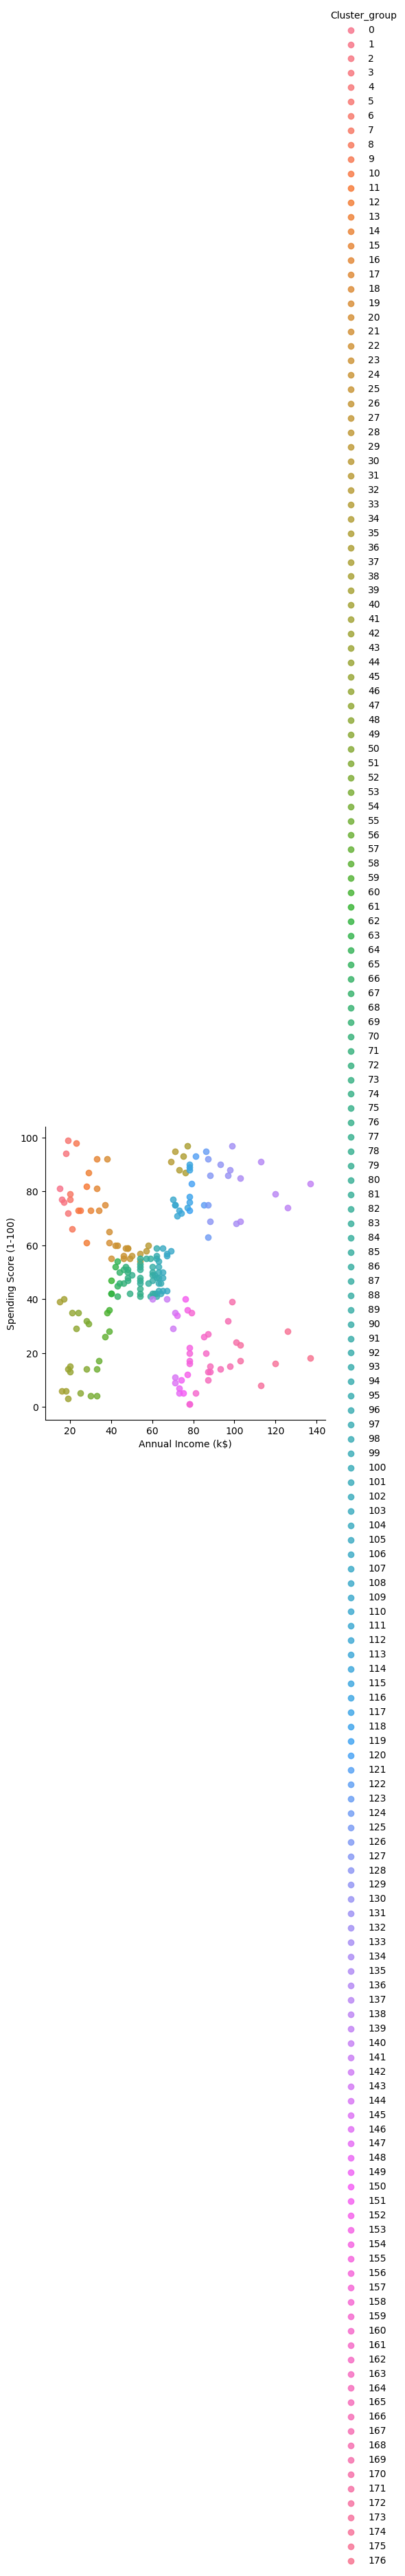

In [19]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False,legend_out=True)